In [92]:
import json
import numpy as np
import os
import math
import librosa
from sklearn.model_selection import train_test_split
from Praat import Praat_IdeaLogic as PLogic
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import librosa.display
import glob
import joblib
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as Tra

#!pip install torchaudio

In [137]:
def extract(audio_file):
    name=os.path.basename(audio_file)
    name=os.path.splitext(name)[0]
    label = int(name[7:8]) - 1
    
    return label, audio_file
    
    
def get_mfccs_augemnted(audio_file):
    X, sample_rate = librosa.load(audio_file,
                                  res_type='kaiser_fast')
    
    # mfcc 
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    
    # augmentation
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
    
    mfccs = np.mean(mfccs.T, axis=0)
    delta_mfccs = np.mean(delta_mfccs.T, axis=0)
    delta2_mfccs = np.mean(delta2_mfccs.T, axis=0)
    mfccs_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs #mfccs, delta_mfccs, delta2_mfccs, mfccs_features

def get_Spectral_Centroid(audio_file):
    X, sr = librosa.load(audio_file,
                        res_type='kaiser_fast')
    
    FRAME_SIZE = 1024
    HOP_LENGTH = 512
    
    sc = librosa.feature.spectral_centroid(y=X, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
    sc = np.mean(sc.T, axis=0)
    
    return sc

# def get_Spectral_Centroid(audio_file):
#     waveform, sample_rate = torchaudio.load(audio_file)
#     spectral_centroid = Tra.SpectralCentroid(sample_rate)(waveform)
#     #spectral_centroid = torch.mean(spectral_centroid.T, axis=0)
    
#     mfcc_module = Tra.MFCC(sample_rate=sample_rate, n_mfcc=40)
#     torch_mfcc = mfcc_module(torch.tensor(audio_file))
    
#     return torch_mfcc
    
    
def return_feats(dir_name):
    X = []
    y = []
    err_cnt = 0
    err_list = []
    exeption_list = []
    
    #progression bar 
    file_count = len(dir_name)
    bar = tqdm(desc="proccessing files", total=file_count)
    tot = 0
    
    for file in dir_name:
        bar.update(1)
        tot += 1
        label, audio_file = extract(file)
        
        try:
            X.append(get_Spectral_Centroid(audio_file))
            y.append(label)
            
        except Exception as e:
            
            err_cnt += 1
            err_list.append(audio_file)
            exeption_list.append(str(e))
            print("{}.error at:".format(err_cnt), audio_file)
            
        
    return X, y, err_cnt, err_list, exeption_list

In [117]:
X, y,_,_,exception_list = return_feats(dir_name)

type(X)

list

In [75]:
exception_list

[]

In [142]:
dir_name = glob.glob("toronto_ds/conc_data/*.wav")
#dir_name = glob.glob("Audio_Data/Actor_04/*.wav")
X, y,_,_,exception_list = return_feats(dir_name)

#X = np.asarray(X)
#y = np.asarray(y)

X_name, y_name = 'Spectral_Centroid_feats/X.joblib', 'Spectral_Centroid_feats/y.joblib'
X, y = np.asarray(X), np.asarray(y)
y = np.asarray(y)
joblib.dump(X, X_name)
joblib.dump(y, y_name)

['Spectral_Centroid_feats/y.joblib']

In [143]:
#X = np.asarray(X)

type(X)

#print(torch.__version__)
#print(torchaudio.__version__)

numpy.ndarray

In [144]:
X = joblib.load(X_name)
y = joblib.load(y_name)

In [145]:
X.shape

(5252, 1)

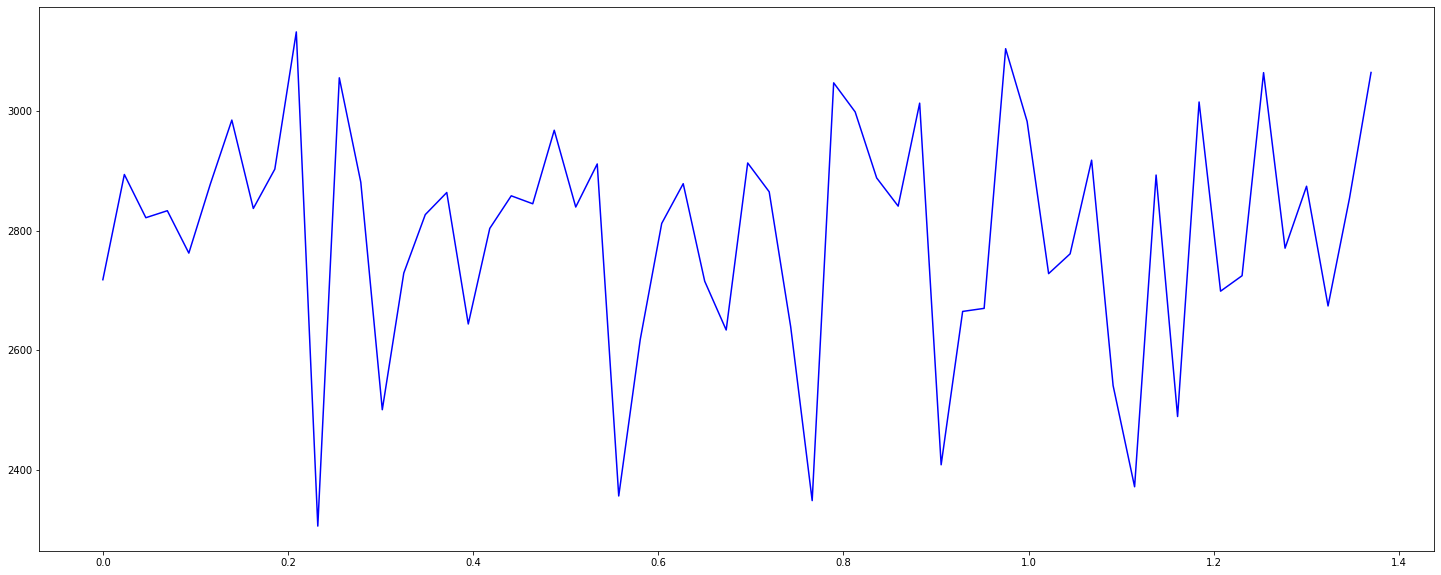

In [83]:
frames = range(len(X))
t = librosa.frames_to_time(frames, hop_length=512)


plt.figure(figsize=(25,10))

plt.plot(t, X, color='b')

plt.show()

In [13]:
_X = X.copy()
_X = np.dstack(_X)
_X.shape

(1, 4, 5252)

In [ ]:
# (5252, 40) -> 1 feat
# (5252, 4, 40) -> 4 feats

In [58]:
!pip list

Package                           Version            
--------------------------------- -------------------
absl-py                           0.9.0              
adabound                          0.0.5              
adanet                            0.8.0              
addict                            2.2.1              
adversarial-robustness-toolbox    1.1.0              
aiobotocore                       1.1.2              
aiohttp                           3.6.2              
aioitertools                      0.7.1              
albumentations                    0.4.3              
alembic                           1.3.3              
alpha-vantage                     2.1.3              
altair                            4.0.1              
amqp                              2.5.2              
aniso8601                         7.0.0              
annoy                             1.16.3             
ansiwrap                          0.8.4              
appdirs                     

gast                              0.2.2              
gensim                            3.8.1              
geocoder                          1.38.1             
geographiclib                     1.50               
geojson                           2.5.0              
geomet                            0.1.2              
geoplotlib                        0.3.2              
geopy                             1.20.0             
gin-config                        0.3.0              
gitdb2                            2.0.6              
GitPython                         3.0.5              
Glances                           3.1.3              
glob2                             0.7                
gluoncv                           0.6.0              
gluonnlp                          0.8.3              
google-api-core                   1.16.0             
google-auth                       1.11.0             
google-auth-oauthlib              0.4.1              
google-cloud-bigquery       

pyflakes                          2.1.1              
PyFunctional                      1.3.0              
pyglet                            1.3.2              
Pygments                          2.5.2              
pyhdb                             0.3.4              
pyinstrument                      3.1.0              
pyinstrument-cext                 0.2.2              
pyjanitor                         0.20.0             
pylama                            7.7.1              
pyLDAvis                          2.1.2              
pylint                            2.4.4              
pymdstat                          0.4.2              
pymongo                           3.10.1             
PyMySQL                           0.9.3              
PyNaCl                            1.3.0              
pyod                              0.7.7.1            
pyodbc                            4.0.28             
pyOpenSSL                         19.1.0             
pyparsing                   

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip uninstall torchaudio; git checkout d92de5b; python setup.py install